# SVM challenge

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 2000
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

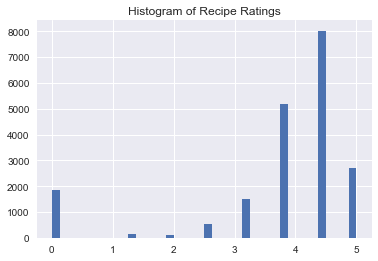

In [4]:
raw_data.rating.hist(bins=40)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [5]:
# Count of nulls
null_count = raw_data.isnull().sum()
null_count[null_count>0] 
# I have not seen this syntax before. The previous line is assigning the variable but this line is saying what? 
# print columns where the null_count variable is greater than 0?

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [6]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [7]:
# This function takes a list(of columns) along with a title and outputs a list showing the number of instances of 
# that column as well as its average rating
def count_rate_list(item_list, Title):
    rating_list = []
    for thing in item_list:
        rating_list.append(raw_data.loc[(raw_data[thing]==1), 'rating'].mean())
        print('{} count: {} and average: {}'.format(
            thing,
            raw_data.loc[(raw_data[thing]==1), 'rating'].count(),
            raw_data.loc[(raw_data[thing]==1), 'rating'].mean()))
    print('\n{} average rating: {}'.format(Title, np.mean(rating_list)))

# Feature engineering

One thing I'm running into is what my cutoff should be in terms of number of mentions. There are 20052 recipes, if something was only mentioned 4 times it does not seem like it would be worth keeping in a prediction feature.

In [8]:
# Building a new dataframe with columns I plan on using in the model
working = pd.DataFrame()

In [9]:
# adding the ratings column for regression as well as a binary version
working['rating'] = raw_data['rating']

working['bin_rating'] = 0
working.loc[
    (working['rating'] >= 3.5),
    'bin_rating'
] = 1

### Adding the meat features

In [10]:
# Adding a pork feature, data in a cell farther down
raw_data['has_pork'] = 0
raw_data.loc[
    (raw_data['pork'] == 1) | 
    (raw_data['pork chop'] == 1) |
    (raw_data['pork rib'] == 1) |
    (raw_data['pork tenderloin'] == 1) |
    (raw_data['prosciutto'] == 1) |
    (raw_data['ham'] == 1),
    'has_pork'
] = 1

working['pork'] = raw_data['has_pork']

#Adding a lamb feature, data in cell farther down
raw_data['has_lamb'] = 0
raw_data.loc[
    (raw_data['lamb'] == 1) |
    (raw_data['ground lamb'] == 1) |
    (raw_data['lamb chop'] == 1) |
    (raw_data['veal'] == 1) |
    (raw_data['lamb shank'] == 1) |
    (raw_data['rack of lamb'] == 1),
    'has_lamb'
] = 1

working['lamb'] = raw_data['has_lamb']

# Adding a beef feature, data in a cell farther down
raw_data['has_beef'] = 0
raw_data.loc[
    (raw_data['beef'] == 1) | 
    (raw_data['beef rib'] == 1) |
    (raw_data['beef shank'] == 1) |
    (raw_data['beef tenderloin'] == 1) |
    (raw_data['buffalo'] == 1) |
    (raw_data['steak'] == 1) |
    (raw_data['venison'] == 1),
    'has_beef'
] = 1

working['beef'] = raw_data['has_beef']

# Adding a fish feature, data in a cell farther down
raw_data['has_fish'] = 0
raw_data.loc[
    (raw_data['fish'] == 1) |
    (raw_data['bass'] == 1) |
    (raw_data['anchovy'] == 1) |
    (raw_data['halibut'] == 1) |
    (raw_data['salmon'] == 1) |
    (raw_data['snapper'] == 1) |
    (raw_data['swordfish'] == 1) |
    (raw_data['tilapia'] == 1) |
    (raw_data['trout'] == 1) |
    (raw_data['cod'] == 1) |
    (raw_data['tuna'] == 1),
    'has_fish'
] = 1

working['fish'] = raw_data['has_fish']

# Adding a poultry feature, data in a cell farther down
raw_data['has_poultry'] = 0
raw_data.loc[
    (raw_data['poultry'] == 1) | 
    (raw_data['chicken'] == 1) |
    (raw_data['duck'] == 1) |
    (raw_data['goose'] == 1) |
    (raw_data['quail'] == 1) |
    (raw_data['turkey'] == 1),
    'has_poultry'
] = 1

working['poultry'] = raw_data['has_poultry']

# Adding a shellfish feature, data in a cell farther down
raw_data['has_shellfish'] = 0
raw_data.loc[
    (raw_data['shellfish'] == 1) |
    (raw_data['seafood'] == 1) |
    (raw_data['crab'] == 1) |
    (raw_data['lobster'] == 1) |
    (raw_data['mussel'] == 1) |
    (raw_data['oyster'] == 1) |
    (raw_data['clam'] == 1) |
    (raw_data['scallop'] == 1) |
    (raw_data['squid'] == 1),
    'has_shellfish'
] = 1

working['shellfish'] = raw_data['has_shellfish']

# Adding a mixed meat feature, data in a cell farther down
raw_data['has_mixed_meat'] = 0
raw_data.loc[
    (raw_data['ground beef'] == 1) | 
    (raw_data['sausage'] == 1) |
    (raw_data['poultry sausage'] == 1),
    'has_mixed_meat'
] = 1

working['mixed_meat'] = raw_data['has_mixed_meat']

# Adding an other category for meats
raw_data['other_meat'] = 0
raw_data.loc[
    (raw_data['hamburger'] == 1) |
    (raw_data['meatball'] == 1) |
    (raw_data['sardine'] == 1) |
    (raw_data['meatloaf'] == 1),
    'other_meat'
] = 1

working['other meats'] = raw_data['other_meat']

# Due to similar averages(and a low count for rabbit) I am lumping meat and rabbit together
raw_data['meat2'] = 0
raw_data.loc[
    (raw_data['meat'] == 1) |
    (raw_data['rabbit'] == 1),
    'meat2'
] = 1

working['meat'] = raw_data['meat2']

# Based on their counts and scores I decided to give Bacon and Shrimp their own features
working['bacon'] = raw_data['bacon']
working['shrimp'] = raw_data['shrimp']

### Adding alcohol features

In [11]:
# Adding an alcohol feature that contains the Liquor, Liqueur and Others features, data in a cell farther down
raw_data['has_booze'] = 0
raw_data.loc[
    (raw_data['alcoholic'] == 1) | 
    (raw_data['beer'] == 1) |
    (raw_data['cocktail'] == 1) |
    (raw_data['egg nog'] == 1) |
    (raw_data['house cocktail'] == 1) |
    (raw_data['margarita'] == 1) |
    (raw_data['martini'] == 1) |
    (raw_data['sangria'] == 1) | 
    (raw_data['spirit'] == 1) |
    (raw_data['spritzer'] == 1) |
    (raw_data['amaretto'] == 1) |
    (raw_data['kirsch'] == 1) |
    (raw_data['brandy'] == 1) |
    (raw_data['calvados'] == 1) |
    (raw_data['chartreuse'] == 1) |
    (raw_data['cognac/armagnac'] == 1) |
    (raw_data['eau de vie'] == 1) |
    (raw_data['frangelico'] == 1) | 
    (raw_data['grand marnier'] == 1) |
    (raw_data['kahlúa'] == 1) |
    (raw_data['liqueur'] == 1) |
    (raw_data['midori'] == 1) |
    (raw_data['pernod'] == 1) |
    (raw_data['triple sec'] == 1) |
    (raw_data['vermouth'] == 1) |
    (raw_data['bourbon'] == 1) |
    (raw_data['gin'] == 1) |
    (raw_data['grappa'] == 1) |
    (raw_data['mezcal'] == 1) |
    (raw_data['rum'] == 1) |
    (raw_data['sake'] == 1) |
    (raw_data['scotch'] == 1) |
    (raw_data['tequila'] == 1) |
    (raw_data['vodka'] == 1) |
    (raw_data['whiskey'] == 1),
    'has_booze'
] = 1

working['alcohol'] = raw_data['has_booze']

# making mixer its own feature 
working['mixer'] = raw_data['mixer']

# Adding an wine feature, data in a cell farther down
raw_data['has_wine'] = 0
raw_data.loc[
    (raw_data['champagne'] == 1) | 
    (raw_data['fortified wine'] == 1) |
    (raw_data['marsala'] == 1) |
    (raw_data['red wine'] == 1) |
    (raw_data['rosé'] == 1) |
    (raw_data['sherry'] == 1) |
    (raw_data['sparkling wine'] == 1) |
    (raw_data['white wine'] == 1) | 
    (raw_data['wine'] == 1),
    'has_wine'
] = 1

working['wine'] = raw_data['has_wine']



### Adding location features

In [12]:
#Adding a location feature, data in cell farther down
raw_data['in_USA'] = 0
raw_data.loc[
    (raw_data['alabama'] == 1) |
    (raw_data['alaska'] == 1) |
    (raw_data['arizona'] == 1) |
    (raw_data['aspen'] == 1) |
    (raw_data['atlanta'] == 1) |
    (raw_data['beverly hills'] == 1) |
    (raw_data['boston'] == 1) |
    (raw_data['brooklyn'] == 1) |
    (raw_data['california'] == 1) |
    (raw_data['cambridge'] == 1) |
    (raw_data['chicago'] == 1) |
    (raw_data['colorado'] == 1) |
    (raw_data['columbus'] == 1) |
    (raw_data['connecticut'] == 1) |
    (raw_data['dallas'] == 1) |
    (raw_data['denver'] == 1) |
    (raw_data['florida'] == 1) |
    (raw_data['georgia'] == 1) |
    (raw_data['hawaii'] == 1) |
    (raw_data['hollywood'] == 1) |
    (raw_data['houston'] == 1) |
    (raw_data['idaho'] == 1) |
    (raw_data['illinois'] == 1) |
    (raw_data['indiana'] == 1) |
    (raw_data['iowa'] == 1) |
    (raw_data['kansas'] == 1) |
    (raw_data['kansas city'] == 1) |
    (raw_data['kentucky'] == 1) |
    (raw_data['las vegas'] == 1) |
    (raw_data['louisiana'] == 1) |
    (raw_data['louisville'] == 1) |
    (raw_data['maine'] == 1) |
    (raw_data['maryland'] == 1) |
    (raw_data['massachusetts'] == 1) |
    (raw_data['miami'] == 1) |
    (raw_data['michigan'] == 1) |
    (raw_data['minneapolis'] == 1) |
    (raw_data['minnesota'] == 1) |
    (raw_data['mississippi'] == 1) |
    (raw_data['missouri'] == 1) |
    (raw_data['nebraska'] == 1) |
    (raw_data['new hampshire'] == 1) |
    (raw_data['new jersey'] == 1) |
    (raw_data['new mexico'] == 1) |
    (raw_data['new orleans'] == 1) |
    (raw_data['new york'] == 1) |
    (raw_data['north carolina'] == 1) |
    (raw_data['ohio'] == 1) |
    (raw_data['oklahoma'] == 1) |
    (raw_data['oregon'] == 1) |
    (raw_data['pacific palisades'] == 1) |
    (raw_data['pasadena'] == 1) |
    (raw_data['pennsylvania'] == 1) |
    (raw_data['pittsburgh'] == 1) |
    (raw_data['portland'] == 1) |
    (raw_data['providence'] == 1) |
    (raw_data['rhode island'] == 1) |
    (raw_data['san francisco'] == 1) |
    (raw_data['seattle'] == 1) |
    (raw_data['south carolina'] == 1) |
    (raw_data['st. louis'] == 1) |
    (raw_data['tennessee'] == 1) |
    (raw_data['texas'] == 1) |
    (raw_data['utah'] == 1) |
    (raw_data['virginia'] == 1) |
    (raw_data['washington'] == 1) |
    (raw_data['washington, d.c.'] == 1) |
    (raw_data['west virginia'] == 1) |
    (raw_data['wisconsin'] == 1) |
    (raw_data['yonkers'] == 1),
    'in_USA'
] = 1

working['in_USA'] = raw_data['in_USA']



### Adding event features

In [13]:
# Adding an event feature, data in a cell farther down
raw_data['event'] = 0
raw_data.loc[
    (raw_data['bastille day'] == 1) | 
    (raw_data['christmas'] == 1) |
    (raw_data['christmas eve'] == 1) |
    (raw_data['cinco de mayo'] == 1) |
    (raw_data['easter'] == 1) |
    (raw_data["father's day"] == 1) |
    (raw_data['fourth of july'] == 1) |
    (raw_data['halloween'] == 1) | 
    (raw_data['lunar new year'] == 1) |
    (raw_data['mardi gras'] == 1) |
    (raw_data["mother's day"] == 1) |
    (raw_data["new year's day"] == 1) |
    (raw_data["new year's eve"] == 1) |
    (raw_data['oktoberfest'] == 1) |
    (raw_data['passover'] == 1) |
    (raw_data['ramadan'] == 1) |
    (raw_data['rosh hashanah/yom kippur'] == 1) |
    (raw_data['shower'] == 1) |
    (raw_data["st. patrick's day"] == 1) |
    (raw_data['summer'] == 1) |
    (raw_data['tailgating'] == 1) |
    (raw_data['thanksgiving'] == 1) |
    (raw_data["valentine's day"] == 1) |
    (raw_data['brunch'] == 1) |
    (raw_data['breakfast'] == 1) |
    (raw_data['appetizer'] == 1) |
    (raw_data['side'] == 1) |
    (raw_data['dessert'] == 1) |
    (raw_data['dinner'] == 1) |
    (raw_data['lunch'] == 1) |
    (raw_data['picnic'] == 1) |
    (raw_data['potluck'] == 1) |
    (raw_data['buffet'] == 1) |
    (raw_data['anniversary'] == 1) |
    (raw_data['backyard bbq'] == 1) |
    (raw_data['birthday'] == 1) |
    (raw_data['cocktail party'] == 1) |
    (raw_data['engagement party'] == 1) |
    (raw_data['game'] == 1) |
    (raw_data['graduation'] == 1) |
    (raw_data['kentucky derby'] == 1) |
    (raw_data['oscars'] == 1) |
    (raw_data['parade'] == 1) |
    (raw_data['party'] == 1) |
    (raw_data['poker/game night'] == 1) |
    (raw_data['wedding'] == 1) |
    (raw_data['family reunion'] == 1) |
    (raw_data['fall'] == 1) |
    (raw_data['summer'] == 1) |
    (raw_data['winter'] == 1) |
    (raw_data['spring'] == 1) |
    (raw_data['back to school'] == 1),
    'event'
    
] = 1

working['event'] = raw_data['event']

### Adding instructions and implements features

In [14]:
# Adding an instruction feature, data in a cell farther down
raw_data['has_instructions'] = 0
raw_data.loc[
    (raw_data['bake'] == 1) | 
    (raw_data['boil'] == 1) |
    (raw_data['braise'] == 1) |
    (raw_data['brine'] == 1) |
    (raw_data['broil'] == 1) |
    (raw_data['chill'] == 1) |
    (raw_data['deep-fry'] == 1) |
    (raw_data['freeze/chill'] == 1) | 
    (raw_data['fry'] == 1) |
    (raw_data['grill'] == 1) | 
    (raw_data['grill/barbecue'] == 1) |
    (raw_data['marinate'] == 1) |
    (raw_data['pan-fry'] == 1) |
    (raw_data['poach'] == 1) |
    (raw_data['roast'] == 1) |
    (raw_data['rub'] == 1) | 
    (raw_data['sauté'] == 1) |
    (raw_data['simmer'] == 1) |
    (raw_data['steam'] == 1) |
    (raw_data['stew'] == 1) |
    (raw_data['stir-fry'] == 1),
    'has_instructions'
] = 1

working['instructions'] = raw_data['has_instructions']

In [15]:
# Adding an implements feature, data in a cell farther down
raw_data['has_implement'] = 0
raw_data.loc[
    (raw_data['double boiler'] == 1) | 
    (raw_data['grill'] == 1) |
    (raw_data['microwave'] == 1) |
    (raw_data['pressure cooker'] == 1) |
    (raw_data['smoker'] == 1) |
    (raw_data['wok'] == 1) |
    (raw_data['blender'] == 1) |
    (raw_data['food processor'] == 1) | 
    (raw_data['ice cream machine'] == 1) |
    (raw_data['mandoline'] == 1) | 
    (raw_data['mortar and pestle'] == 1) |
    (raw_data['ramekin'] == 1) |
    (raw_data['skewer'] == 1),
    'has_implement'
] = 1

working['implements'] = raw_data['has_implement']

### Adding a diets feature

In [16]:
# Adding an feature for popular diet types and searches, data in a cell farther down
raw_data['popular diet'] = 0
raw_data.loc[
    (raw_data['dairy free'] == 1) | 
    (raw_data['healthy'] == 1) |
    (raw_data['kosher'] == 1) |
    (raw_data['no sugar added'] == 1) |
    (raw_data['pescatarian'] == 1) |
    (raw_data['soy free'] == 1) |
    (raw_data['tree nut free'] == 1) |
    (raw_data['vegetarian'] == 1) | 
    (raw_data['wheat/gluten-free'] == 1) |
    (raw_data['sugar conscious'] == 1) |
    (raw_data['kidney friendly'] == 1),
    'popular diet'
] = 1

working['popular_diet'] = raw_data['popular diet']

### Adding recipe features

In [17]:
# Adding a recipe feature, data in a cell farther down
raw_data['recipe'] = 0
raw_data.loc[
    (raw_data['3-ingredient recipes'] == 1) | 
    (raw_data['advance prep required'] == 1) |
    (raw_data['house & garden'] == 1) |
    (raw_data['kosher for passover'] == 1) |
    (raw_data['quick and healthy'] == 1) |
    (raw_data['weelicious'] == 1),
    'recipe'
] = 1

working['has_a_recipe'] = raw_data['recipe']

# Creating a separate feature for the 'quick & easy' recipe search
working['quick & easy'] = raw_data['quick & easy']

### Adding dairy features

In [18]:
# Adding a cheese feature, data in a cell farther down
raw_data['has_cheese'] = 0
raw_data.loc[
    (raw_data['blue cheese'] == 1) | 
    (raw_data['brie'] == 1) |
    (raw_data['cheddar'] == 1) |
    (raw_data['cheese'] == 1) |
    (raw_data['cottage cheese'] == 1) |
    (raw_data['cream cheese'] == 1) |
    (raw_data['feta'] == 1) |
    (raw_data['fontina'] == 1) |
    (raw_data['goat cheese'] == 1) |
    (raw_data['gouda'] == 1) |
    (raw_data['marscarpone'] == 1) |
    (raw_data['monterey jack'] == 1) |
    (raw_data['mozzarella'] == 1) |
    (raw_data['parmesan'] == 1) |
    (raw_data['ricotta'] == 1) |
    (raw_data['swiss cheese'] == 1), 
    'has_cheese'
] = 1

working['cheese'] = raw_data['has_cheese']

In [19]:
# adding an 'other' dairy feature that has negative correlations
raw_data['other_dairy'] = 0
raw_data.loc[
    (raw_data['butter'] == 1) | 
    (raw_data['buttermilk'] == 1) |
    (raw_data['créme de cacao'] == 1) |
    (raw_data['cr��me de cacao'] == 1) |
    (raw_data['custard'] == 1) |
    (raw_data['egg nog'] == 1) |
    (raw_data['ice cream'] == 1) |
    (raw_data['yogurt'] == 1),
    'other_dairy'
] = 1

working['other_dairy'] = raw_data['other_dairy']

In [20]:
# Adding a basic dairy feature
raw_data['basic_dairy'] = 0
raw_data.loc[
    (raw_data['dairy'] == 1) | 
    (raw_data['egg'] == 1) |
    (raw_data['milk/cream'] == 1) |
    (raw_data['sour cream'] == 1),
    'basic_dairy'
] = 1

working['basic_dairy'] = raw_data['basic_dairy']

### Adding a nuts feature

In [21]:
#Adding a feature for the nuts, data in cell farther down
raw_data['has_nuts'] = 0
raw_data.loc[
    (raw_data['almond'] == 1) |
    (raw_data['cashew'] == 1) |
    (raw_data['chestnut'] == 1) |
    (raw_data['hazelnut'] == 1) |
    (raw_data['macadamia nut'] == 1) |
    (raw_data['nut'] == 1) |
    (raw_data['peanut'] == 1) |
    (raw_data['pecan'] == 1) |
    (raw_data['pistachio'] == 1) |
    (raw_data['walnut'] == 1),
    'has_nuts'
] = 1

working['nuts'] = raw_data['has_nuts']

### Adding vegetable and fruit features

In [22]:
# Adding a couple features for veggies, data in a cell farther down

raw_data['veggies'] = 0
raw_data.loc[
    (raw_data['corn'] == 1) |
    (raw_data['mushroom'] == 1) |
    (raw_data['olive'] == 1) |
    (raw_data['onion'] == 1) |
    (raw_data['shallot'] == 1) |
    (raw_data['rhubarb'] == 1) |
    (raw_data['tomatillo'] == 1) |
    (raw_data['tomato'] == 1) |
    (raw_data['vegetable'] == 1) |
    (raw_data['artichoke'] == 1) |
    (raw_data['asparagus'] == 1) |
    (raw_data['brussel sprout'] == 1) |
    (raw_data['celery'] == 1) |
    (raw_data['cucumber'] == 1) |
    (raw_data['green bean'] == 1) |
    (raw_data['pea'] == 1),
    'veggies'
] = 1

working['veggies'] = raw_data['veggies']

In [23]:
raw_data['salad_greens'] = 0
raw_data.loc[
    (raw_data['arugula'] == 1) |
    (raw_data['bok choy'] == 1) |
    (raw_data['broccoli rabe'] == 1) |
    (raw_data['cabbage'] == 1) |
    (raw_data['chard'] == 1) |
    (raw_data['collard greens'] == 1) |
    (raw_data['kale'] == 1) |
    (raw_data['leafy green'] == 1) |
    (raw_data['lettuce'] == 1) |
    (raw_data['mustard greens'] == 1) |
    (raw_data['salad'] == 1) |
    (raw_data['spinach'] == 1) |
    (raw_data['watercress'] == 1),
    'salad_greens'
] = 1

working['salad greens'] = raw_data['salad_greens']

In [24]:
# adding a root vegetables feature
raw_data['roots'] = 0
raw_data.loc[
    (raw_data['beet'] == 1) |
    (raw_data['potato'] == 1) |
    (raw_data['radish'] == 1) |
    (raw_data['root vegetable'] == 1) |
    (raw_data['carrot'] == 1) |
    (raw_data['sweet potato/yam'] == 1) |
    (raw_data['turnip'] == 1) |
    (raw_data['yuca'] == 1),
    'roots'
] = 1

working['roots'] = raw_data['roots']

In [25]:
# adding a peppers feature
raw_data['has_peppers'] = 0
raw_data.loc[
    (raw_data['bell pepper'] == 1) |
    (raw_data['hot pepper'] == 1) |
    (raw_data['jalapeño'] == 1),
    'has_peppers'
] = 1

working['peppers'] = raw_data['has_peppers']

In [26]:
# Adding a gourds feature
raw_data['gourds'] = 0
raw_data.loc[
    (raw_data['butternut squash'] == 1) |
    (raw_data['eggplant'] == 1) |
    (raw_data['rutabaga'] == 1) |
    (raw_data['squash'] == 1) |
    (raw_data['pumpkin'] == 1),
    'gourds'
] = 1

working['gourds'] = raw_data['gourds']

In [27]:
# Adding a couple fruit features

raw_data['fruit_dried'] = 0
raw_data.loc[
    (raw_data['currant'] == 1) |
    (raw_data['date'] == 1) |
    (raw_data['dried fruit'] == 1) |
    (raw_data['fig'] == 1) |
    (raw_data['persimmon'] == 1) |
    (raw_data['prune'] == 1) |
    (raw_data['raisin'] == 1),
    'fruit_dried'
] = 1

working['dried_fruit'] = raw_data['fruit_dried']

raw_data['tropic_fruit'] = 0
raw_data.loc[
    (raw_data['banana'] == 1) |
    (raw_data['kiwi'] == 1) |
    (raw_data['lemon'] == 1) |
    (raw_data['lime'] == 1) |
    (raw_data['passion fruit'] == 1) |
    (raw_data['pineapple'] == 1) |
    (raw_data['tropical fruit'] == 1),
    'tropic_fruit'
] = 1

working['tropical_fruit'] = raw_data['tropic_fruit']

raw_data['popular_fruit'] = 0
raw_data.loc[
    (raw_data['apple'] == 1) |
    (raw_data['banana'] == 1) |
    (raw_data['cherry'] == 1) |
    (raw_data['grape'] == 1) |
    (raw_data['orange'] == 1) |
    (raw_data['passion fruit'] == 1) |
    (raw_data['pineapple'] == 1) |
    (raw_data['tropical fruit'] == 1),
    'popular_fruit'
] = 1

working['popular_fruit'] = raw_data['popular_fruit']

### Adding soft drink feature

In [28]:
# Adding a softdrinks feature

raw_data['soft_drinks'] = 0
raw_data.loc[
    (raw_data['coffee'] == 1) |
    (raw_data['drink'] == 1) |
    (raw_data['drinks'] == 1) |
    (raw_data['fruit juice'] == 1) |
    (raw_data['hot drink'] == 1) |
    (raw_data['iced tea'] == 1) |
    (raw_data['lemon juice'] == 1) |
    (raw_data['non-alcoholic'] == 1) |
    (raw_data['orange juice'] == 1) |
    (raw_data['punch'] == 1) |
    (raw_data['smoothie'] == 1) |
    (raw_data['tea'] == 1),
    'soft_drinks'
] = 1

working['drinks'] = raw_data['soft_drinks']

### Addings some features for food
The following features were created using the columns that listed actual premade food, spices, sauces, ingredients, etc...

In [29]:
# Adding a couple food feature

raw_data['gift_foods'] = 0
raw_data.loc[
    (raw_data['cake'] == 1) |
    (raw_data['chocolate'] == 1) |
    (raw_data['gourmet'] == 1) |
    (raw_data['edible gift'] == 1),
    'gift_foods'
] = 1

working['gift_foods'] = raw_data['gift_foods']

raw_data['hearty_dishes'] = 0
raw_data.loc[
    (raw_data['casserole/gratin'] == 1) |
    (raw_data['sandwich'] == 1) |
    (raw_data['soup/stew'] == 1),
    'hearty_dishes'
] = 1

working['hearty_dishes'] = raw_data['hearty_dishes']

In [30]:
# Adding a couple more food feature

raw_data['rice/pasta'] = 0
raw_data.loc[
    (raw_data['brown rice'] == 1) |
    (raw_data['couscous'] == 1) |
    (raw_data['noodle'] == 1) |
    (raw_data['orzo'] == 1) |
    (raw_data['pasta'] == 1) |
    (raw_data['rice'] == 1) |
    (raw_data['wild rice'] == 1),
    'rice/pasta'
] = 1

working['rice_pasta'] = raw_data['rice/pasta']

raw_data['breads'] = 0
raw_data.loc[
    (raw_data['phyllo/puff pastry dough'] == 1) |
    (raw_data['stuffing/dressing'] == 1) |
    (raw_data['pastry'] == 1) |
    (raw_data['tortillas'] == 1),
    'breads'
] = 1

working['breads'] = raw_data['breads']

In [31]:
# Adding a couple food features for seasonings

raw_data['popular_spices'] = 0
raw_data.loc[
    (raw_data['basil'] == 1) |
    (raw_data['capers'] == 1) |
    (raw_data['cilantro'] == 1) |
    (raw_data['curry'] == 1) |
    (raw_data['garlic'] == 1) |
    (raw_data['ginger'] == 1) |
    (raw_data['herb'] == 1) |
    (raw_data['lemongrass'] == 1) |
    (raw_data['sage'] == 1) |
    (raw_data['spice'] == 1) |
    (raw_data['tamarind'] == 1) |
    (raw_data['thyme'] == 1) |
    (raw_data['wasabi'] == 1) |
    (raw_data['saffron'] == 1) |
    (raw_data['pepper'] == 1),
    'popular_spices'
] = 1

working['seasonings'] = raw_data['popular_spices']

raw_data['sauces2'] = 0
raw_data.loc[
    (raw_data['condiment'] == 1) |
    (raw_data['condiment/spread'] == 1) |
    (raw_data['cranberry sauce'] == 1) |
    (raw_data['dip'] == 1) |
    (raw_data['salsa'] == 1) |
    (raw_data['sesame oil'] == 1) |
    (raw_data['salad dressing'] == 1) |
    (raw_data['vinegar'] == 1),
    'sauces2'
] = 1

working['sauces'] = raw_data['sauces2']

raw_data['sauces3'] = 0
raw_data.loc[
    (raw_data['honey'] == 1) |
    (raw_data['maple syrup'] == 1) |
    (raw_data['molasses'] == 1) |
    (raw_data['soy sauce'] == 1),
    'sauces3'
] = 1

working['sweet_sauces'] = raw_data['sauces3']

In [32]:
working.describe()

,rating,bin_rating,pork,lamb,beef,fish,poultry,shellfish,mixed_meat,other meats,meat,bacon,shrimp,alcohol,mixer,wine,in_USA,event,instructions,implements,popular_diet,has_a_recipe,quick & easy,cheese,other_dairy,basic_dairy,nuts,veggies,salad greens,roots,peppers,gourds,dried_fruit,tropical_fruit,popular_fruit,drinks,gift_foods,hearty_dishes,rice_pasta,breads,seasonings,sauces,sweet_sauces
count,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,0.793287,0.067475,0.027279,0.050120,0.068472,0.097048,0.054608,0.024387,0.000898,0.014562,0.029274,0.025185,0.086974,0.031418,0.060293,0.033513,0.852134,0.604827,0.11919,0.556852,0.035957,0.267903,0.152304,0.041193,0.218831,0.106373,0.367544,0.147766,0.117195,0.075055,0.032515,0.045282,0.103331,0.108119,0.082236,0.382904,0.089318,0.085777,0.025185,0.312986,0.085228,0.045980
std,1.340829,0.404958,0.250848,0.162900,0.218197,0.252560,0.296030,0.227219,0.154250,0.029948,0.119795,0.168577,0.156689,0.281804,0.174450,0.238035,0.179976,0.354976,0.488900,0.32402,0.496770,0.186186,0.442878,0.359324,0.198741,0.413464,0.308323,0.482148,0.354877,0.321661,0.263486,0.177369,0.207928,0.304399,0.310538,0.274731,0.486107,0.285209,0.280041,0.156689,0.463720,0.279228,0.209448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building the SVM model
The assignment seems to want to turn this into a classification model so maybe classifying the recipes that are over 3.5 as good and under as bad?

### Classifier

In [33]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = working[['pork', 'lamb', 'beef', 'fish', 'poultry', 'shellfish', 'mixed_meat', 'other meats', 'meat', 'bacon', 
             'shrimp', 'alcohol', 'mixer', 'wine', 'in_USA', 'event', 'instructions', 'implements', 'popular_diet', 
             'has_a_recipe', 'quick & easy', 'cheese', 'other_dairy', 'basic_dairy', 'nuts', 'veggies', 'salad greens', 
             'roots', 'peppers', 'gourds', 'dried_fruit', 'tropical_fruit', 'popular_fruit', 'drinks', 'gift_foods', 
             'hearty_dishes', 'rice_pasta', 'breads', 'seasonings', 'sauces', 'sweet_sauces']]
Y = working['bin_rating']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, X, Y, cv = 5))

[ 0.79431563  0.79705809  0.79825436  0.79800499  0.79875312]


This is interesting, it seems the data is consistent at least, and .79 average is pretty good for a first run through and no tuning after straight feature building.

## Feature Selection test

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k = 35).fit_transform(X, Y)

In [116]:
svm.fit(X_new, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
cross_val_score(svm, X_new, Y, cv=5)

array([ 0.79431563,  0.79705809,  0.79825436,  0.79750623,  0.79900249])

# Features Data
Below are the various measures and reasonings used to create the above features.

## Meat features

Combining the various types of meats into similar groups for cleaner features

In [35]:
meats = ['anchovy', 'bacon', 'bass', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'brisket', 
         'buffalo', 'caviar', 'chicken', 'clam', 'cod', 'crab', 'duck', 'fish', 'goose', 'ground beef', 
         'ground lamb', 'halibut', 'ham', 'hamburger', 'lamb', 'lamb chop', 'lamb shank', 'lobster', 
         'meat', 'meatball', 'meatloaf', 'mussel', 'octopus', 'oyster', 'pork', 'pork chop', 'pork rib', 
         'pork tenderloin', 'poultry', 'poultry sausage', 'prosciutto', 'quail', 'rabbit', 'rack of lamb', 
         'salmon', 'sardine', 'sausage', 'scallop', 'seafood', 'shellfish', 'shrimp', 'snapper', 'squid', 
         'steak', 'swordfish', 'tilapia', 'trout', 'tuna', 'venison', 'turkey']

pork_list = ['pork', 'ham', 'pork chop', 'pork rib', 'pork tenderloin', 'prosciutto']

lamb_list = ['lamb', 'rack of lamb', 'lamb chop', 'ground lamb', 'lamb shank', 'veal']

beef_list = ['beef', 'beef rib', 'beef shank', 'beef tenderloin', 'brisket', 'buffalo', 
             'steak', 'venison']

poultry_list = ['poultry', 'chicken', 'duck', 'goose', 'turkey', 'quail']

fish_list = ['fish', 'bass','anchovy', 'halibut', 'snapper', 'swordfish', 'tilapia', 
             'trout', 'tuna', 'salmon', 'cod', 'sardine']

shellfish_list = ['shellfish', 'crab', 'lobster', 'mussel', 'oyster', 'seafood', 'squid', 
                  'octopus', 'clam', 'scallop']

mixed_meat_list = ['hamburger', 'meatball', 'meatloaf', 'ground beef', 'poultry sausage', 
                   'sausage', 'meat']

In [36]:
# pork feature data
count_rate_list(pork_list, 'Pork')

pork count: 928 and average: 3.972925646551724
ham count: 222 and average: 3.9442567567567566
pork chop count: 93 and average: 4.025537634408602
pork rib count: 57 and average: 4.133771929824562
pork tenderloin count: 120 and average: 4.255208333333333
prosciutto count: 155 and average: 4.056451612903226

Pork average rating: 4.0646919856297


In [37]:
# Lamb feature data
count_rate_list(lamb_list, 'Lamb')

lamb count: 359 and average: 4.0494428969359335
rack of lamb count: 29 and average: 3.706896551724138
lamb chop count: 45 and average: 4.388888888888889
ground lamb count: 35 and average: 4.339285714285714
lamb shank count: 18 and average: 3.8541666666666665
veal count: 123 and average: 3.9278455284552845

Lamb average rating: 4.044421041159438


In [38]:
# Beef feature data
count_rate_list(beef_list, 'Beef')

beef count: 811 and average: 3.9858199753390875
beef rib count: 56 and average: 4.207589285714286
beef shank count: 14 and average: 4.151785714285714
beef tenderloin count: 72 and average: 4.262152777777778
brisket count: 38 and average: 4.276315789473684
buffalo count: 8 and average: 4.375
steak count: 243 and average: 4.097222222222222
venison count: 9 and average: 4.444444444444445

Beef average rating: 4.225041276157152


In [39]:
# Poultry feature data
count_rate_list(poultry_list, 'Poultry')

poultry count: 620 and average: 3.849798387096774
chicken count: 1344 and average: 3.8453311011904763
duck count: 99 and average: 3.705808080808081
goose count: 16 and average: 3.7109375
turkey count: 456 and average: 3.913103070175439
quail count: 15 and average: 3.9166666666666665

Poultry average rating: 3.82360746765624


In [40]:
# Fish feature data
count_rate_list(fish_list, 'Fish')

# Caviar is being ignored due to lack of counts

fish count: 936 and average: 3.90491452991453
bass count: 90 and average: 3.923611111111111
anchovy count: 45 and average: 3.3055555555555554
halibut count: 89 and average: 4.073033707865169
snapper count: 59 and average: 3.781779661016949
swordfish count: 16 and average: 3.4375
tilapia count: 12 and average: 4.0625
trout count: 54 and average: 4.155092592592593
tuna count: 134 and average: 3.955223880597015
salmon count: 315 and average: 3.9444444444444446
cod count: 76 and average: 3.8404605263157894
sardine count: 4 and average: 1.25

Fish average rating: 3.636176334117762


In [41]:
# Shellfish feature data, shrimp seems to be a bit stronger than other shellfish and will be given its own feature
count_rate_list(shellfish_list, 'Shellfish')

shellfish count: 560 and average: 3.8872767857142856
crab count: 156 and average: 3.858173076923077
lobster count: 83 and average: 3.7876506024096384
mussel count: 127 and average: 3.8533464566929134
oyster count: 38 and average: 3.585526315789474
seafood count: 401 and average: 3.748441396508728
squid count: 46 and average: 3.6684782608695654
octopus count: 7 and average: 3.9285714285714284
clam count: 134 and average: 3.8152985074626864
scallop count: 170 and average: 4.088235294117647

Shellfish average rating: 3.822099812505944


In [42]:
# Mixed meats feature data
count_rate_list(mixed_meat_list, 'Mixed meats')

hamburger count: 4 and average: 2.96875
meatball count: 8 and average: 3.125
meatloaf count: 2 and average: 1.25
ground beef count: 90 and average: 3.7777777777777777
poultry sausage count: 23 and average: 4.076086956521739
sausage count: 384 and average: 3.9680989583333335
meat count: 285 and average: 4.133771929824562

Mixed meats average rating: 3.3284979460653443


Based on the data it seems like ground beef, poultry sausage and sausage would all do well being grouped together and  the rest can be put in an 'other' category or dropped.

The meat feature is also interesting, it doesn't seem right to categorize it with any of the other types. The same goes for rabbit, but rabbit has 7 mentions so it might not be worth keeping at all.

## Alcohol features

Combining the various alcohol related inputs for cleaner features

In [43]:
boozes = ['alcoholic', 'amaretto', 'aperitif', 'beer', 'bitters', 'bourbon', 'brandy', 'calvados', 'campari', 
          'champagne', 'chartreuse', 'cocktail', 'cognac/armagnac', 'digestif', 'eau de vie', 'egg nog', 
          'fortified wine', 'frangelico', 'gin', 'grand marnier', 'grappa', 'house cocktail', 'kahlúa', 
          'liqueur', 'margarita', 'marsala', 'martini', 'mezcal', 'midori', 'mixer', 'pernod', 'red wine', 
          'rosé', 'rum', 'sake', 'sangria', 'scotch', 'sherry', 'sparkling wine', 'spirit', 'spritzer', 
          'tequila', 'triple sec', 'vermouth', 'vodka', 'whiskey', 'white wine', 'wine', 'kirsch']

others_alc = ['alcoholic', 'beer', 'cocktail', 'egg nog', 'house cocktail', 'margarita', 
          'martini', 'sangria', 'spirit', 'spritzer']

liqueurs = ['amaretto', 'brandy', 'calvados', 'chartreuse', 'cognac/armagnac', 'eau de vie', 
            'frangelico', 'grand marnier', 'kahlúa', 'liqueur', 'midori', 'pernod', 'triple sec', 
            'vermouth', 'kirsch']

specials_alc = ['aperitif', 'bitters', 'campari', 'digestif']

liquors = ['bourbon', 'gin', 'grappa', 'mezcal', 'rum', 'sake', 'scotch', 'tequila', 'vodka', 
          'whiskey']

wines = ['champagne', 'fortified wine', 'marsala', 'red wine', 'rosé', 'sherry', 
        'sparkling wine', 'white wine', 'wine']

# based on the data 'mixer' should probably be on its own

In [44]:
# others(alcohol) feature data
count_rate_list(others_alc, 'Others')

alcoholic count: 835 and average: 2.268712574850299
beer count: 112 and average: 3.6495535714285716
cocktail count: 380 and average: 2.356907894736842
egg nog count: 9 and average: 3.611111111111111
house cocktail count: 6 and average: 3.4375
margarita count: 20 and average: 3.78125
martini count: 7 and average: 3.6607142857142856
sangria count: 17 and average: 3.75
spirit count: 219 and average: 1.8436073059360731
spritzer count: 7 and average: 3.2142857142857144

Others average rating: 3.1573642458062894


In [45]:
# liqueurs feature data
count_rate_list(liqueurs, 'Liqueurs')

amaretto count: 39 and average: 4.086538461538462
brandy count: 270 and average: 2.962962962962963
calvados count: 20 and average: 3.75
chartreuse count: 18 and average: 1.0416666666666667
cognac/armagnac count: 91 and average: 3.3653846153846154
eau de vie count: 9 and average: 3.75
frangelico count: 23 and average: 4.184782608695652
grand marnier count: 1 and average: 4.375
kahlúa count: 25 and average: 4.1
liqueur count: 317 and average: 2.7543375394321767
midori count: 6 and average: 3.6458333333333335
pernod count: 54 and average: 2.0949074074074074
triple sec count: 80 and average: 3.234375
vermouth count: 11 and average: 1.25
kirsch count: 31 and average: 2.439516129032258

Liqueurs average rating: 3.1356869816302355


In [46]:
# specials feature data
count_rate_list(specials_alc, 'Specials_alc')

aperitif count: 12 and average: 1.8229166666666667
bitters count: 127 and average: 1.4074803149606299
campari count: 19 and average: 1.7763157894736843
digestif count: 5 and average: 3.125

Specials_alc average rating: 2.032928192775245


In [47]:
# liquor feature data
count_rate_list(liquors, 'Liquors')

bourbon count: 125 and average: 3.65
gin count: 226 and average: 1.3108407079646018
grappa count: 4 and average: 4.6875
mezcal count: 1 and average: 3.75
rum count: 331 and average: 2.837990936555891
sake count: 21 and average: 3.9583333333333335
scotch count: 22 and average: 1.5909090909090908
tequila count: 89 and average: 3.5603932584269664
vodka count: 125 and average: 3.425
whiskey count: 57 and average: 2.675438596491228

Liquors average rating: 3.1446405923681113


In [48]:
# wine feature data
count_rate_list(wines, 'Wines')

champagne count: 106 and average: 2.9599056603773586
fortified wine count: 76 and average: 2.3273026315789473
marsala count: 36 and average: 4.305555555555555
red wine count: 271 and average: 3.992158671586716
rosé count: 4 and average: 4.53125
sherry count: 125 and average: 3.525
sparkling wine count: 54 and average: 2.9166666666666665
white wine count: 487 and average: 3.9181211498973307
wine count: 191 and average: 3.6976439790575917

Wines average rating: 3.574844923857796


Due to similar scores I am going to combine the Others, Liquor and Liqueur features into one. I will also create a wine feature and the mixer feature previously discussed

In [49]:
#creating the combined big feature of alcohols
LOL_list = others_alc
LOL_list.extend(liquors)
LOL_list.extend(liqueurs)

count_rate_list(LOL_list, 'LOLs')

alcoholic count: 835 and average: 2.268712574850299
beer count: 112 and average: 3.6495535714285716
cocktail count: 380 and average: 2.356907894736842
egg nog count: 9 and average: 3.611111111111111
house cocktail count: 6 and average: 3.4375
margarita count: 20 and average: 3.78125
martini count: 7 and average: 3.6607142857142856
sangria count: 17 and average: 3.75
spirit count: 219 and average: 1.8436073059360731
spritzer count: 7 and average: 3.2142857142857144
bourbon count: 125 and average: 3.65
gin count: 226 and average: 1.3108407079646018
grappa count: 4 and average: 4.6875
mezcal count: 1 and average: 3.75
rum count: 331 and average: 2.837990936555891
sake count: 21 and average: 3.9583333333333335
scotch count: 22 and average: 1.5909090909090908
tequila count: 89 and average: 3.5603932584269664
vodka count: 125 and average: 3.425
whiskey count: 57 and average: 2.675438596491228
amaretto count: 39 and average: 4.086538461538462
brandy count: 270 and average: 2.962962962962963
c

## Locations feature

Exploring if there is a relationshp between the locations listed(cities, states and countries) and ratings

In [50]:
locations = ['alabama', 'alaska', 'arizona', 'aspen', 'atlanta', 'australia', 'beverly hills', 
             'boston', 'brooklyn', 'bulgaria', 'california', 'cambridge', 'canada', 'chicago', 
             'chile', 'colorado', 'columbus', 'connecticut', 'costa mesa', 'cuba', 'dallas', 
             'denver', 'dominican republic', 'egypt', 'england', 'florida', 'france', 'georgia', 
             'germany', 'guam', 'haiti', 'hawaii', 'healdsburg', 'hollywood', 'houston', 'idaho', 
             'illinois', 'indiana', 'iowa', 'ireland', 'israel', 'italy', 'jamaica', 'japan', 
             'kansas', 'kansas city', 'kentucky', 'las vegas', 'lancaster', 'london', 'long beach', 
             'louisiana', 'louisville', 'maine', 'maryland', 'massachusetts', 'mexico', 'miami', 
             'michigan', 'minneapolis', 'minnesota', 'mississippi', 'missouri', 'nebraska', 'new hampshire', 
             'new jersey', 'new mexico', 'new orleans', 'new york', 'north carolina', 'ohio', 
             'oklahoma', 'oregon', 'pacific palisades', 'paris', 'pasadena', 'pennsylvania', 'peru',
             'philippines', 'pittsburgh', 'portland', 'providence', 'rhode island', 'san francisco', 
             'seattle', 'south carolina', 'st. louis', 'switzerland', 'tennessee', 'texas', 'utah', 
             'virginia', 'washington', 'washington, d.c.', 'west virginia', 'windsor', 'wisconsin', 
             'yonkers']

In [51]:
# I can already see a problem with these lists since models cannot predict using inputs they haven't already seen
cities = ['aspen', 'atlanta', 'beverly hills', 'boston', 'brooklyn', 'cambridge', 'chicago', 
          'columbus', 'costa mesa', 'dallas', 'denver', 'healdsburg', 'hollywood', 'houston', 
          'kansas city', 'las vegas', 'louisville', 'miami', 'minneapolis', 
          'new orleans', 'new york', 'pacific palisades', 'pasadena', 'pittsburgh', 'portland', 
          'providence', 'san francisco', 'seattle', 'st. louis', 'washington, d.c.', 'yonkers']

states = ['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut', 'florida', 
          'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 
          'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 
          'missouri', 'nebraska', 'new hampshire', 'new jersey', 'new mexico', 'new york', 
          'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 
          'south carolina', 'tennessee', 'texas', 'utah', 'virginia', 'washington', 'west virginia', 
          'wisconsin']

intls = ['australia', 'bulgaria', 'canada', 'chile', 'cuba', 'dominican republic', 'egypt', 
         'england', 'france', 'germany', 'guam', 'haiti', 'ireland', 'israel', 'italy', 
         'jamaica', 'japan', 'lancaster', 'london', 'mexico', 'paris', 'peru', 'philippines', 
         'switzerland', 'windsor']

In [52]:
city_rates = []
for city in cities:
    city_rates.append(raw_data.loc[(raw_data[city]==1), 'rating'].mean())

state_rates = []
for state in states:
    state_rates.append(raw_data.loc[(raw_data[state]==1), 'rating'].mean()) 

intl_rates = []
for place in intls:
    intl_rates.append(raw_data.loc[(raw_data[place]==1), 'rating'].mean())

print('Cities', np.mean(city_rates))
print('States', np.mean(state_rates))
print('International', np.mean(intl_rates))

Cities 3.93907038622
States 3.84220342192
International 3.52448717949


In [53]:
# city feature data
count_rate_list(cities, 'Cities')

aspen count: 1 and average: 4.375
atlanta count: 7 and average: 4.285714285714286
beverly hills count: 1 and average: 4.375
boston count: 5 and average: 4.125
brooklyn count: 7 and average: 3.6607142857142856
cambridge count: 4 and average: 4.53125
chicago count: 4 and average: 3.75
columbus count: 3 and average: 4.166666666666667
costa mesa count: 1 and average: 3.75
dallas count: 5 and average: 4.0
denver count: 3 and average: 4.166666666666667
healdsburg count: 2 and average: 2.1875
hollywood count: 1 and average: 3.75
houston count: 1 and average: 4.375
kansas city count: 2 and average: 3.125
las vegas count: 1 and average: 5.0
louisville count: 2 and average: 2.5
miami count: 2 and average: 4.0625
minneapolis count: 2 and average: 4.0625
new orleans count: 2 and average: 2.1875
new york count: 49 and average: 4.0561224489795915
pacific palisades count: 1 and average: 4.375
pasadena count: 12 and average: 4.322916666666667
pittsburgh count: 12 and average: 3.9583333333333335
portla

In [54]:
# state feature data
count_rate_list(states, 'States')

alabama count: 3 and average: 2.7083333333333335
alaska count: 2 and average: 3.75
arizona count: 8 and average: 4.21875
california count: 146 and average: 4.015410958904109
colorado count: 16 and average: 3.7109375
connecticut count: 11 and average: 3.9204545454545454
florida count: 43 and average: 3.9244186046511627
georgia count: 20 and average: 4.125
hawaii count: 4 and average: 4.0625
idaho count: 1 and average: 2.5
illinois count: 8 and average: 3.75
indiana count: 5 and average: 4.5
iowa count: 1 and average: 3.75
kansas count: 3 and average: 3.3333333333333335
kentucky count: 3 and average: 3.125
louisiana count: 4 and average: 3.125
maine count: 5 and average: 4.0
maryland count: 12 and average: 3.6458333333333335
massachusetts count: 47 and average: 4.042553191489362
michigan count: 24 and average: 3.75
minnesota count: 11 and average: 4.261363636363637
mississippi count: 1 and average: 3.125
missouri count: 14 and average: 3.9732142857142856
nebraska count: 3 and average: 4.

The cities and states in the US seem to be rated higher relative to international locations but I do not want to get any more specific than that for fear of overfitting. I still need to compare these averages to every row that does not have any of these locations included to see if there is an actual difference.

## Events feature
Exploring the data around the event-related columns to see if there is a noticeable  difference. I have decided to drop any column with less than 30 mentions for now.

In [55]:
events_list = ['#cakeweek', 'anniversary', 'back to school', 'backyard bbq', 'bastille day', 
            'birthday', 'brunch', 'breakfast', 'camping', 'christmas', 'christmas eve', 
            'cinco de mayo', 'cocktail party', 'dessert', 'dinner', 'diwali', 'drinks', 
            'easter', 'engagement party', 'entertaining', 'fall', "father's day", 'flaming hot summer', 
            'fourth of july', 'friendsgiving', 'game', 'graduation', 'halloween', "hors d'oeuvre", 
            'kentucky derby', 'kwanzaa', 'labor day', 'lunar new year', 'lunch', 'mardi gras', 
            "mother's day", "new year's day", "new year's eve", 'oktoberfest', 'oscars', 
            'parade', 'party', 'passover', 'persian new year', 'picnic', 'poker/game night', 
            'potluck', 'ramadan', 'rosh hashanah/yom kippur', 'shower', "st. patrick's day", 
            'summer', 'tailgating', 'thanksgiving', "valentine's day", 'wedding', 'winter', 
            'buffet', 'family reunion']

# Some natural breaks in the list
holidays = ['bastille day', 'christmas', 'christmas eve', 'cinco de mayo', 
            'easter', "father's day", 'fourth of july', 'halloween', 'lunar new year', 
            'mardi gras', "mother's day", "new year's day", "new year's eve", 
            'oktoberfest', 'passover', 'ramadan', 'rosh hashanah/yom kippur', 
            "st. patrick's day", 'thanksgiving', "valentine's day"]
            # diwali, friendsgiving, kwanzaa, labor day, persian new year dropped

meal_list = ['brunch', 'breakfast', 'dessert', 'dinner', 'lunch', 'appetizer', 'side', 
             'picnic', 'potluck', 'buffet'] # hors d'ouevre dropped

celebrations = ['anniversary', 'backyard bbq', 'birthday', 'cocktail party', 'engagement party', 
                'game', 'graduation', 'kentucky derby', 'oscars', 'parade', 'party', 
                'poker/game night', 'shower', 'tailgating', 'wedding', 'family reunion'] #entertaining dropped

seasons = ['fall', 'summer', 'winter', 'spring'] # flaming hot summer dropped

leftovers = ['back to school'] # #cakeweek and camping dropped

In [56]:
# Holidays feature data
count_rate_list(holidays, 'Holidays')

bastille day count: 30 and average: 3.8541666666666665
christmas count: 1039 and average: 3.9473051010587104
christmas eve count: 331 and average: 3.8028700906344413
cinco de mayo count: 179 and average: 3.725558659217877
easter count: 234 and average: 4.014423076923077
father's day count: 295 and average: 4.076271186440678
fourth of july count: 376 and average: 3.941156914893617
halloween count: 42 and average: 3.511904761904762
lunar new year count: 46 and average: 4.103260869565218
mardi gras count: 59 and average: 3.718220338983051
mother's day count: 165 and average: 3.867424242424242
new year's day count: 82 and average: 4.115853658536586
new year's eve count: 165 and average: 3.617424242424242
oktoberfest count: 37 and average: 3.3445945945945947
passover count: 183 and average: 3.855874316939891
ramadan count: 39 and average: 3.701923076923077
rosh hashanah/yom kippur count: 68 and average: 4.145220588235294
st. patrick's day count: 55 and average: 3.590909090909091
thanksgivin

In [57]:
# Meal list feature data
count_rate_list(meal_list, 'Meal_list')

brunch count: 833 and average: 3.792767106842737
breakfast count: 712 and average: 3.71313202247191
dessert count: 3573 and average: 3.7898824517212426
dinner count: 2705 and average: 3.921441774491682
lunch count: 1359 and average: 3.8102465047829286
appetizer count: 1372 and average: 3.8392857142857144
side count: 3151 and average: 3.7944303395747383
picnic count: 519 and average: 3.8619942196531793
potluck count: 485 and average: 3.957474226804124
buffet count: 132 and average: 4.048295454545454

Meal_list average rating: 3.852894981517371


In [58]:
# Celebrations feature data
count_rate_list(celebrations, 'Celebrations')

anniversary count: 111 and average: 3.7612612612612613
backyard bbq count: 938 and average: 3.9385660980810235
birthday count: 193 and average: 3.915155440414508
cocktail party count: 1154 and average: 2.95223136915078
engagement party count: 184 and average: 3.5971467391304346
game count: 36 and average: 4.236111111111111
graduation count: 89 and average: 3.932584269662921
kentucky derby count: 40 and average: 4.21875
oscars count: 112 and average: 3.978794642857143
parade count: 143 and average: 3.7194055944055946
party count: 892 and average: 3.5103699551569507
poker/game night count: 135 and average: 3.9166666666666665
shower count: 327 and average: 3.4365443425076454
tailgating count: 129 and average: 3.875968992248062
wedding count: 112 and average: 3.828125
family reunion count: 316 and average: 3.9378955696202533

Celebrations average rating: 3.797223565767147


In [59]:
# Seasons feature data
count_rate_list(seasons, 'Seasons')

fall count: 3015 and average: 3.9291044776119404
summer count: 4151 and average: 3.787641532160925
winter count: 3099 and average: 3.8873426911907067
spring count: 1715 and average: 3.822886297376093

Seasons average rating: 3.8567437495849166


In [60]:
#leftovers feature data
count_rate_list(leftovers, 'Leftovers')

back to school count: 202 and average: 3.873762376237624

Leftovers average rating: 3.873762376237624


Cakeweek and camping have 7 combined mentions so I'm going to drop those. Back to school has 202 mentions and 
an average 3.87 rating, which fits in nicely with the other events. While the natural breaks are interesting it seems like the terms should just be combined since they are all very similar in rating.

## Cook types feature
Exploring if there is a link between actual cooking directions and satisfaction rating

In [61]:
cooking_types = ['bake', 'blender', 'boil', 'braise', 'brine', 'broil', 'chill', 
                 'coffee grinder', 'deep fry', 'double boiler', 'food processor', 
                 'freeze/chill', 'fry', 'grill', 'grill/barbecue', 'ice cream machine', 
                 'juicer', 'marinade', 'mandoline', 'marinate', 'microwave', 'mortar and pestle', 
                 'pan-fry', 'pasta maker', 'poach', 'pressure cooker', 'ramekin', 
                 'roast', 'rub', 'sauté', 'simmer', 'skewer', 'slow cooker', 'smoker', 
                 'steam', 'stew', 'stir-fry', 'wok']

instructions = ['bake', 'boil', 'braise', 'brine', 'broil', 'chill', 'deep-fry', 'freeze/chill', 
                'fry', 'grill', 'grill/barbecue', 'marinate', 'pan-fry', 'poach', 'roast', 'rub', 
                'sauté', 'simmer', 'steam', 'stew', 'stir-fry'] #marinade dropped

implements = ['blender', 'coffee grinder', 'double boiler', 'food processor', 'grill', 
              'ice cream machine', 'juicer', 'mandoline', 'microwave', 'mortar and pestle', 
              'pasta maker', 'pressure cooker', 'ramekin', 'skewer', 'smoker', 
              'wok', 'marinade', 'slow cooker']

cookers = ['double boiler', 'grill', 'microwave', 'pressure cooker', 'smoker', 'wok'] # slow cooker dropped

processors = ['blender', 'food processor', 'ice cream machine', 'mandoline', 
             'mortar and pestle', 'pasta maker', 'ramekin', 'skewer'] # juicer, coffee grinder, pasta maker dropped

In [62]:
#instructions feature data
count_rate_list(instructions, 'Instructions')

bake count: 4413 and average: 3.908763879447088
boil count: 445 and average: 3.7429775280898876
braise count: 330 and average: 4.130681818181818
brine count: 36 and average: 4.045138888888889
broil count: 489 and average: 4.00178936605317
chill count: 1126 and average: 3.827708703374778
deep-fry count: 92 and average: 3.457880434782609
freeze/chill count: 417 and average: 3.946342925659472
fry count: 430 and average: 3.7252906976744184
grill count: 564 and average: 3.9572251773049647
grill/barbecue count: 1104 and average: 3.981544384057971
marinate count: 601 and average: 4.000623960066556
pan-fry count: 249 and average: 3.965863453815261
poach count: 135 and average: 3.8472222222222223
roast count: 1320 and average: 4.085700757575758
rub count: 3 and average: 5.0
sauté count: 2044 and average: 3.979329745596869
simmer count: 890 and average: 3.740168539325843
steam count: 225 and average: 3.811111111111111
stew count: 178 and average: 3.9360955056179776
stir-fry count: 227 and averag

In [63]:
# Implements feature data
count_rate_list(implements, 'Implements')

blender count: 618 and average: 3.7965210355987056
coffee grinder count: 17 and average: 3.198529411764706
double boiler count: 32 and average: 3.80859375
food processor count: 973 and average: 3.890673175745118
grill count: 564 and average: 3.9572251773049647
ice cream machine count: 162 and average: 3.946759259259259
juicer count: 6 and average: 2.3958333333333335
mandoline count: 10 and average: 3.6875
microwave count: 37 and average: 3.902027027027027
mortar and pestle count: 2 and average: 5.0
pasta maker count: 12 and average: 3.3854166666666665
pressure cooker count: 8 and average: 3.984375
ramekin count: 34 and average: 4.227941176470588
skewer count: 7 and average: 3.75
smoker count: 7 and average: 4.196428571428571
wok count: 102 and average: 3.7254901960784315
marinade count: 1 and average: 0.0
slow cooker count: 25 and average: 2.775

Implements average rating: 3.5349063211487426


In [64]:
# cooking instruments feature
count_rate_list(cookers, 'Cookers')

double boiler count: 32 and average: 3.80859375
grill count: 564 and average: 3.9572251773049647
microwave count: 37 and average: 3.902027027027027
pressure cooker count: 8 and average: 3.984375
smoker count: 7 and average: 4.196428571428571
wok count: 102 and average: 3.7254901960784315

Cookers average rating: 3.929023286973166


In [65]:
#processors feature data
count_rate_list(processors, 'Processors')

blender count: 618 and average: 3.7965210355987056
food processor count: 973 and average: 3.890673175745118
ice cream machine count: 162 and average: 3.946759259259259
mandoline count: 10 and average: 3.6875
mortar and pestle count: 2 and average: 5.0
pasta maker count: 12 and average: 3.3854166666666665
ramekin count: 34 and average: 4.227941176470588
skewer count: 7 and average: 3.75

Processors average rating: 3.9606014142175425


## Diet feature
Exploring if there is a relationship between listed diet and satisfaction. Did people tend to like the low-carb meals they made but disliked 'kidney friendly' fare?

In [66]:
diet_types = ['dairy free', 'fat free', 'healthy', 'high fiber', 'kid-friendly', 'kidney friendly', 
              'kosher', 'low cal', 'low carb', 'low cholesterol', 'low fat', 'low sodium', 'low sugar', 
              'low/no sugar', 'no sugar added', 'no-cook', 'non-alcoholic', 'organic', 'paleo', 
              'pescatarian', 'soy free', 'tree nut free', 'vegan', 'vegetarian', 'wheat/gluten-free']

free_low_non = ['dairy free', 'fat free', 'low cal', 'low carb', 'low cholesterol', 'low fat', 
                  'low sodium', 'low/no sugar', 'no sugar added', 'no-cook', 'non-alcoholic', 
                  'soy free', 'tree nut free', 'wheat/gluten-free'] # low sugar dropped

others_diet = ['paleo', 'pescatarian', 'vegan', 'vegetarian'] #healthy, organic dropped
               
benefits = ['high fiber', 'kid-friendly', 'kidney friendly', 'kosher']

populars = ['dairy free', 'healthy', 'kosher', 'no sugar added', 'pescatarian', 'soy free', 
            'tree nut free', 'vegetarian', 'wheat/gluten-free', 'kidney friendly', 'sugar conscious']

In [67]:
count_rate_list(diet_types, 'Diets')

dairy free count: 3206 and average: 3.773003742981909
fat free count: 376 and average: 3.620345744680851
healthy count: 2351 and average: 3.8052956188855807
high fiber count: 1013 and average: 3.992472852912142
kid-friendly count: 1791 and average: 3.58179787828029
kidney friendly count: 2313 and average: 3.7943147427583224
kosher count: 6175 and average: 3.8331983805668015
low cal count: 1049 and average: 3.934699714013346
low carb count: 363 and average: 4.116735537190083
low cholesterol count: 445 and average: 3.883426966292135
low fat count: 929 and average: 3.634956942949408
low sodium count: 389 and average: 3.762853470437018
low sugar count: 14 and average: 2.767857142857143
low/no sugar count: 282 and average: 3.6458333333333335
no sugar added count: 3132 and average: 3.861550127713921
no-cook count: 1251 and average: 3.7365107913669067
non-alcoholic count: 218 and average: 2.7236238532110093
organic count: 7 and average: 3.9285714285714284
paleo count: 779 and average: 3.67859

In [68]:
# diet feature data
count_rate_list(free_low_non, 'Free Low or No')

dairy free count: 3206 and average: 3.773003742981909
fat free count: 376 and average: 3.620345744680851
low cal count: 1049 and average: 3.934699714013346
low carb count: 363 and average: 4.116735537190083
low cholesterol count: 445 and average: 3.883426966292135
low fat count: 929 and average: 3.634956942949408
low sodium count: 389 and average: 3.762853470437018
low/no sugar count: 282 and average: 3.6458333333333335
no sugar added count: 3132 and average: 3.861550127713921
no-cook count: 1251 and average: 3.7365107913669067
non-alcoholic count: 218 and average: 2.7236238532110093
soy free count: 8088 and average: 3.8660670128585557
tree nut free count: 7044 and average: 3.862684554230551
wheat/gluten-free count: 4906 and average: 3.7857980024459845

Free Low or No average rating: 3.7291492709789296


In [69]:
# others_diet feature data
count_rate_list(others_diet, 'Others(diet)')

paleo count: 779 and average: 3.678594351732991
pescatarian count: 6042 and average: 3.824788977159881
vegan count: 1851 and average: 3.5477444624527283
vegetarian count: 6846 and average: 3.7761101373064565

Others(diet) average rating: 3.706809482163014


In [70]:
count_rate_list(populars, 'Popular diets')

dairy free count: 3206 and average: 3.773003742981909
healthy count: 2351 and average: 3.8052956188855807
kosher count: 6175 and average: 3.8331983805668015
no sugar added count: 3132 and average: 3.861550127713921
pescatarian count: 6042 and average: 3.824788977159881
soy free count: 8088 and average: 3.8660670128585557
tree nut free count: 7044 and average: 3.862684554230551
vegetarian count: 6846 and average: 3.7761101373064565
wheat/gluten-free count: 4906 and average: 3.7857980024459845
kidney friendly count: 2313 and average: 3.7943147427583224
sugar conscious count: 2466 and average: 3.859742497972425

Popular diets average rating: 3.8220503449891265


This feature was mostly useless(almost exactly average) until I pulled out just the popular searches(mentioned in 10% or more of the dataset). 

## People feature
Did mentioning a famous chef or having a name at all influence the satisfaction rating?

In [71]:
people_list = ['anthony bourdain', 'dorie greenspan', 'emeril lagasse', 'nancy silverton', 'suzanne goin']

In [72]:
for person in people_list:
    print('{} count {} and average: {}'.format(
        person,
        raw_data.loc[(raw_data[person]==1),'rating'].count(), 
        raw_data.loc[(raw_data[person]==1), 'rating'].mean())
)

anthony bourdain count 2 and average: 1.25
dorie greenspan count 1 and average: 0.0
emeril lagasse count 1 and average: 5.0
nancy silverton count 1 and average: 0.0
suzanne goin count 1 and average: 5.0


Based on the ridiculously low counts I feel safe in dropping these columns completely

## Recipe feature
Exploring weather columns with names that sounded like a cookbook had an effect on satisfaction

In [73]:
recipe_types = ['22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 
                'cook like a diner', 'cookbook critic', 'epi loves the microwave', 'epi + ushg', 'house & garden', 
                'kitchen olympics', 'kosher for passover', 'no meat, no problem', 'one-pot meal', 
                'quick and healthy', 'sandwich theory', 'tested & improved', 'weelicious', 
                'cookbooks', 'snack week']  # 'quick & easy removed to own feature
    
popular_recipes = ['3-ingredient recipes', 'advance prep required', 'house & garden', 
                   'kosher for passover', 'quick and healthy', 'weelicious']
                   # 30 days of groceries, cook like a diner, cookbook critic, epi(both), kitchen olympics, 
                   # no meat no problem, tested & improved, cookbooks, 22-minute meals, one-pot meal, 
                   # sandwich theory, snack week dropped due to low counts

In [74]:
#recipe feature data
count_rate_list(popular_recipes, 'Recipes')

3-ingredient recipes count: 27 and average: 1.9675925925925926
advance prep required count: 109 and average: 3.2224770642201834
house & garden count: 459 and average: 1.8055555555555556
kosher for passover count: 31 and average: 3.286290322580645
quick and healthy count: 65 and average: 3.2115384615384617
weelicious count: 33 and average: 1.7234848484848484

Recipes average rating: 2.5361564741620475


In [75]:
raw_data.groupby('quick & easy')['rating'].mean()

quick & easy
0.0    3.677793
1.0    3.814687
Name: rating, dtype: float64

Quick and Easy seems good enough to warrant it's own feature(especially considering its relative count). Paring down the other columns to build a feature for recipes(negative pressure on ratings).

## Dairy feature
Exploring the relationship between rating and different types of dairy like cheese

In [76]:
dairy_list = ['blue cheese', 'brie', 'butter', 'buttermilk', 'cheddar', 'cheese', 
              'cottage cheese', 'cream cheese', 'créme de cacao', 'cr��me de cacao', 'custard', 
              'dairy', 'egg', 'egg nog', 'feta', 'fontina', 'goat cheese', 'gouda', 'ice cream', 
              'marscarpone', 'milk/cream', 'monterey jack', 'mozzarella', 'parmesan', 'ricotta', 
              'sour cream', 'swiss cheese', 'yogurt']

cheeses = ['blue cheese', 'brie', 'cheddar', 'cheese', 'cottage cheese', 'cream cheese', 'feta', 
           'fontina', 'goat cheese', 'gouda', 'marscarpone', 'monterey jack', 'mozzarella', 'parmesan', 
           'ricotta', 'swiss cheese']

other_dairy = ['butter', 'buttermilk', 'créme de cacao', 'cr��me de cacao', 'custard', 
               'egg nog', 'ice cream', 'yogurt']

basic_dairy = ['dairy', 'egg', 'milk/cream', 'sour cream']

In [77]:
# Cheeses feature data
count_rate_list(cheeses, 'Cheeses')

blue cheese count: 235 and average: 3.9574468085106385
brie count: 12 and average: 3.8020833333333335
cheddar count: 257 and average: 3.6964980544747084
cheese count: 1355 and average: 3.919741697416974
cottage cheese count: 37 and average: 3.8175675675675675
cream cheese count: 375 and average: 4.006666666666667
feta count: 229 and average: 4.00382096069869
fontina count: 40 and average: 4.015625
goat cheese count: 307 and average: 4.120521172638436
gouda count: 10 and average: 4.4375
marscarpone count: 6 and average: 4.166666666666667
monterey jack count: 50 and average: 3.725
mozzarella count: 190 and average: 3.825657894736842
parmesan count: 644 and average: 3.9285714285714284
ricotta count: 160 and average: 3.73046875
swiss cheese count: 74 and average: 3.8513513513513513

Cheeses average rating: 3.9378242095395812


In [78]:
# Other dairy feature data
count_rate_list(other_dairy, 'Others(dairy)')

butter count: 195 and average: 3.3365384615384617
buttermilk count: 73 and average: 3.3219178082191783
créme de cacao count: 21 and average: 1.1607142857142858
cr��me de cacao count: 1 and average: 3.75
custard count: 2 and average: 2.5
egg nog count: 9 and average: 3.611111111111111
ice cream count: 12 and average: 2.3958333333333335
yogurt count: 528 and average: 3.5203598484848486

Others(dairy) average rating: 2.949559356050152


In [79]:
# Basic dairy feature data
count_rate_list(basic_dairy, 'Basic Dairy')

dairy count: 1496 and average: 3.875752005347594
egg count: 1768 and average: 3.77227092760181
milk/cream count: 1995 and average: 3.8201754385964914
sour cream count: 404 and average: 3.9402846534653464

Basic Dairy average rating: 3.8521207562528104


Cheese is always popular and the more basic dairy items were as well. Creating a third feature out of the unpopular dairy items.

## Fruit, Vegetable and Nut features
Exploring the mention of various types of fruits, vegetables and nuts on rating

In [80]:
fruit_veggie_nut = ['almond', 'apple', 'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 
                    'avocado', 'banana', 'beet', 'bell pepper', 'berry', 'blackberry', 'blueberry', 
                    'bok choy', 'broccoli', 'broccoli rabe', 'brussel sprout', 'butternut squash', 
                    'cabbage', 'cantaloupe', 'carrot', 'cashew', 'cauliflower', 'celery', 'chard', 
                    'cherry', 'chestnut', 'chile pepper', 
                    'citrus', 'coconut', 'collard greens', 'corn', 'cranberry', 'cucumber', 
                    'currant', 'date', 'dried fruit', 'eggplant', 'fig', 'fruit', 
                    'grape', 'grapefruit', 'green bean', 'guava', 'hazelnut', 
                    'honeydew', 'hot pepper', 'jalapeño', 'jerusalem artichoke', 'jícama', 'kale', 'kiwi', 
                    'kumquat', 'leafy green', 'lemon', 'lettuce', 'lime', 'lingonberry', 'lychee', 
                    'macadamia nut', 'mango', 'melon', 'mushroom', 'mustard greens', 'nectarine', 
                    'nut', 'okra', 'olive', 'onion', 'orange', 'papaya', 'passion fruit', 'pea', 'peach', 
                    'peanut', 'pear', 'pecan', 'persimmon', 'pickles', 'pine nut', 'pistachio', 'plantain', 
                    'pineapple', 'plum', 'poblano', 'pomegranate', 'potato', 'prune', 'quince', 
                    'radicchio', 'radish', 'raisin', 'raspberry', 'rhubarb', 'root vegetable', 'rutabaga', 
                    'salad', 'shallot', 'spinach', 'squash', 'strawberry', 'sugar snap pea', 
                    'sweet potato/yam', 'tangerine', 'tomatillo', 'tree nut', 'tropical fruit', 'turnip', 
                    'vegetable', 'walnut', 'watercress', 'watermelon', 'yellow squash', 'yuca']

In [81]:
fruits = ['apple', 'apricot', 'asian pear', 'avocado', 'banana', 'berry', 'blackberry', 'blueberry', 
          'cantaloupe', 'cherry', 'citrus', 'cranberry', 'currant', 'date', 'dried fruit', 'fig', 
          'fruit', 'grape', 'grapefruit', 'guava', 'honeydew', 'kiwi', 'kumquat', 'lemon', 'lime', 
          'lingonberry', 'lychee', 'mango', 'melon', 'nectarine', 'orange', 'papaya', 'passion fruit', 
          'peach', 'pear', 'persimmon', 'plantain', 'pineapple', 'plum', 'pomegranate', 'prune', 
          'quince', 'raisin', 'raspberry', 'strawberry', 'tangerine', 'tropical fruit', 'watermelon']

dried_fruit = ['currant', 'date', 'dried fruit', 'fig', 'persimmon', 'prune', 'raisin'] #quince dropped
#good

melons = ['cantaloupe', 'honeydew', 'melon', 'watermelon']
#bad

stone_fruits = ['apricot', 'avocado', 'cherry', 'mango', 'nectarine', 'papaya', 'peach', 'plum']
#bad

tropics = ['banana', 'kiwi', 'lemon', 'lime', 'orange', 'passion fruit', 'pineapple', 
           'tropical fruit'] #citrus dropped
#good

popular_fruit = ['apple', 'banana', 'cherry', 'grape', 'orange', 'peach', 'raspberry', 
            'strawberry'] #blackberry, blueberry, watermelon dropped

In [82]:
#fruit feature data
count_rate_list(tropics, 'Fruits')

banana count: 177 and average: 3.3686440677966103
kiwi count: 34 and average: 3.9338235294117645
lemon count: 1104 and average: 3.6441349637681157
lime count: 546 and average: 3.6034798534798536
orange count: 837 and average: 3.5476403823178018
passion fruit count: 44 and average: 3.1818181818181817
pineapple count: 264 and average: 3.399621212121212
tropical fruit count: 62 and average: 3.2358870967741935

Fruits average rating: 3.4893811609359666


In [83]:
vegetables = ['artichoke', 'arugula', 'asparagus', 'bok choy', 'broccoli', 'beet', 'bell pepper', 
              'broccoli rabe', 'brussel sprout', 'butternut squash', 'cabbage', 'carrot', 
              'cauliflower', 'celery', 'chard', 'chile pepper', 'collard greens', 'corn', 'cucumber', 
              'eggplant', 'green bean', 'hot pepper', 'jalapeño', 'jerusalem artichoke', 'jícama', 
              'kale', 'leafy green', 'lettuce', 'mushroom', 'mustard greens', 'okra', 'olive', 'onion', 
              'pea', 'pickles', 'poblano', 'potato', 'radicchio', 'shallot', 'radish', 'rhubarb', 
              'root vegetable', 'rutabaga', 'salad', 'spinach', 'squash', 'sweet potato/yam', 'tomatillo', 
              'turnip', 'vegetable', 'watercress', 'yellow squash', 'yuca', 'pumpkin']

leftover_veg = ['corn', 'mushroom', 'olive', 'onion', 'shallot', 'rhubarb', 'tomatillo', 
                'tomato', 'vegetable', 'artichoke', 'asparagus', 'brussel sprout', 'celery', 
                'cucumber', 'green bean', 'pea'] 
                #jerusalem artichoke, pickles, radicchio, broccoli, cauliflower and okra dropped

salad_greens = ['arugula', 'bok choy', 'broccoli rabe', 'cabbage', 'chard', 'collard greens', 'kale', 
                'leafy green', 'lettuce', 'mustard greens', 'salad', 'spinach', 'watercress'] #radicchio dropped

root_veggies = ['beet', 'potato', 'radish', 'root vegetable', 'carrot', 'sweet potato/yam', 
                'turnip', 'yuca'] #jicama dropped

gourds = ['butternut squash', 'eggplant', 'rutabaga', 'squash', 'pumpkin'] # yellow squash dropped

peppers = ['bell pepper', 'hot pepper', 'jalapeño'] #chile pepper and poblano dropped

In [84]:
count_rate_list(leftover_veg, 'veggies')

corn count: 371 and average: 3.8797169811320753
mushroom count: 843 and average: 3.8901245551601424
olive count: 556 and average: 3.8905125899280577
onion count: 2238 and average: 3.9035969615728328
shallot count: 353 and average: 3.8881019830028327
rhubarb count: 80 and average: 3.8125
tomatillo count: 82 and average: 4.001524390243903
tomato count: 2140 and average: 3.8951518691588785
vegetable count: 2087 and average: 3.8338524197412553
artichoke count: 153 and average: 3.713235294117647
asparagus count: 207 and average: 3.8949275362318843
brussel sprout count: 56 and average: 4.140625
celery count: 341 and average: 3.597873900293255
cucumber count: 379 and average: 3.758245382585752
green bean count: 226 and average: 3.702986725663717
pea count: 211 and average: 3.770734597156398

veggies average rating: 3.8483568866242894


In [85]:
# salad greens feature data
count_rate_list(salad_greens, 'salad')

arugula count: 278 and average: 4.006294964028777
bok choy count: 59 and average: 4.13135593220339
broccoli rabe count: 48 and average: 3.90625
cabbage count: 307 and average: 3.6197068403908794
chard count: 85 and average: 3.875
collard greens count: 31 and average: 3.689516129032258
kale count: 145 and average: 3.8663793103448274
leafy green count: 903 and average: 3.907115171650055
lettuce count: 225 and average: 3.95
mustard greens count: 36 and average: 3.90625
salad count: 1516 and average: 3.829155672823219
spinach count: 377 and average: 3.831233421750663
watercress count: 138 and average: 3.7318840579710146

salad average rating: 3.8653955000150066


In [86]:
count_rate_list(root_veggies, 'taters')

beet count: 210 and average: 3.7857142857142856
potato count: 1128 and average: 3.863031914893617
radish count: 208 and average: 3.2632211538461537
root vegetable count: 188 and average: 3.8430851063829787
carrot count: 701 and average: 3.721469329529244
sweet potato/yam count: 286 and average: 3.9903846153846154
turnip count: 92 and average: 3.838315217391304
yuca count: 6 and average: 4.270833333333333

taters average rating: 3.8220068695594414


In [87]:
# Gourd feature data
count_rate_list(gourds, 'gourds')

butternut squash count: 182 and average: 4.017857142857143
eggplant count: 219 and average: 3.858447488584475
rutabaga count: 44 and average: 4.076704545454546
squash count: 151 and average: 3.9072847682119205
pumpkin count: 118 and average: 3.9989406779661016

gourds average rating: 3.9718469246148365


In [88]:
# pepper feature data
count_rate_list(peppers, 'Peppers')

bell pepper count: 767 and average: 3.8934159061277707
hot pepper count: 487 and average: 3.7974845995893225
jalapeño count: 361 and average: 3.869459833795014

Peppers average rating: 3.8534534465040355


In [89]:
nuts = ['almond', 'cashew', 'chestnut', 'coconut', 'hazelnut', 'macadamia nut', 'nut', 'peanut', 'pecan', 
        'pine nut', 'pistachio', 'tree nut', 'walnut', 'peanut butter']

eating_nuts = ['almond', 'cashew', 'chestnut', 'hazelnut', 'macadamia nut', 'nut', 'peanut', 'pecan', 
               'pistachio', 'walnut']

In [90]:
count_rate_list(eating_nuts, 'nuts')

almond count: 584 and average: 3.7735445205479454
cashew count: 68 and average: 3.7408088235294117
chestnut count: 74 and average: 3.910472972972973
hazelnut count: 182 and average: 4.000686813186813
macadamia nut count: 50 and average: 3.5875
nut count: 905 and average: 3.804558011049724
peanut count: 153 and average: 3.8684640522875817
pecan count: 331 and average: 3.959592145015106
pistachio count: 176 and average: 3.8103693181818183
walnut count: 425 and average: 3.776470588235294

nuts average rating: 3.8232467245006667


In [91]:
seasonings = ['anise', 'basil', 'capers', 'caraway', 'cardamom', 'chive', 'cilantro', 
              'cinnamon', 'citrus', 'clove', 'condiment', 'condiment/spread', 'coriander', 'cranberry sauce', 
              'cumin', 'curry', 'dill', 'dip', 'fennel', 'fig', 'garlic', 'ginger', 'green onion/scallion', 
              'herb', 'honey', 'horseradish', 'hot pepper', 'leek', 'lemongrass', 'maple syrup', 'mayonnaise', 
              'mint', 'molasses', 'mustard', 'nutmeg', 'oregano', 'paprika', 'parsley', 'pepper', 'poppy', 
              'saffron', 'sage', 'salsa', 'sesame', 'sesame oil', 'soy sauce', 'spice', 'stock', 'tamarind', 
              'tarragon', 'thyme', 'vanilla', 'vinegar', 'wasabi', 'salad dressing']

sauces = ['condiment', 'condiment/spread', 'cranberry sauce', 'dip', 'salsa', 'sesame oil', 'salad dressing', 
          'vinegar'] #stock dropped

sweet_sauce = ['honey', 'maple syrup', 'molasses', 'soy sauce']

popular_spices = ['basil', 'capers', 'cilantro', 'citrus', 'curry', 'fig', 'garlic', 'ginger', 'herb', 
                      'hot pepper', 'lemongrass', 'mayonnaise', 'mustard', 'sage', 'spice', 'tamarind', 
                      'thyme', 'wasabi', 'saffron', 'pepper'] #poppy dropped

In [92]:
count_rate_list(popular_spices, 'spices')

basil count: 565 and average: 3.8174778761061945
capers count: 185 and average: 4.003378378378378
cilantro count: 607 and average: 3.871499176276771
citrus count: 863 and average: 3.8702201622247974
curry count: 273 and average: 3.866758241758242
fig count: 154 and average: 4.103084415584416
garlic count: 1643 and average: 3.851186853317103
ginger count: 1146 and average: 3.836714659685864
herb count: 1681 and average: 3.9106186793575253
hot pepper count: 487 and average: 3.7974845995893225
lemongrass count: 84 and average: 3.9657738095238093
mayonnaise count: 378 and average: 3.8607804232804233
mustard count: 600 and average: 3.970833333333333
sage count: 182 and average: 4.045329670329671
spice count: 680 and average: 3.792279411764706
tamarind count: 21 and average: 4.166666666666667
thyme count: 333 and average: 3.903903903903904
wasabi count: 23 and average: 3.9402173913043477
saffron count: 113 and average: 4.076327433628318
pepper count: 612 and average: 3.9450571895424837

spic

In [93]:
count_rate_list(sauces, 'sauce')

condiment count: 96 and average: 2.2395833333333335
condiment/spread count: 924 and average: 3.594426406926407
cranberry sauce count: 4 and average: 1.875
dip count: 20 and average: 1.75
salsa count: 6 and average: 1.9791666666666667
sesame oil count: 42 and average: 3.5267857142857144
salad dressing count: 178 and average: 3.462078651685393
vinegar count: 658 and average: 3.768047112462006

sauce average rating: 2.77438598566994


In [94]:
count_rate_list(sweet_sauce, 'sweets')

honey count: 401 and average: 3.813902743142145
maple syrup count: 146 and average: 3.9426369863013697
molasses count: 112 and average: 4.129464285714286
soy sauce count: 293 and average: 3.9377133105802047

sweets average rating: 3.9559293314345014


In [95]:
drinks = ['coffee', 'drink', 'drinks', 'fruit juice', 'hot drink', 
          'iced tea', 'lemon juice', 'non-alcoholic', 'orange juice', 'punch', 
          'smoothie', 'tea'] #apple juice, pomegranate juice, iced coffee dropped

In [96]:
count_rate_list(drinks, 'Drinks')

coffee count: 190 and average: 3.598684210526316
drink count: 1087 and average: 2.362580496780129
drinks count: 11 and average: 2.0454545454545454
fruit juice count: 488 and average: 3.3004610655737703
hot drink count: 37 and average: 3.1587837837837838
iced tea count: 18 and average: 3.0555555555555554
lemon juice count: 154 and average: 3.2751623376623376
non-alcoholic count: 218 and average: 2.7236238532110093
orange juice count: 52 and average: 3.1490384615384617
punch count: 73 and average: 2.7739726027397262
smoothie count: 42 and average: 2.931547619047619
tea count: 110 and average: 2.8579545454545454

Drinks average rating: 2.936068256443983


In [97]:
foods = ['cake', 'candy', 'candy thermometer', 'casserole/gratin', 
         'chocolate', 'cookies', 'cookie', 'edible gift', 'frozen dessert', 'gourmet', 
         'jam or jelly', 'oatmeal', 'pie', 'sandwich', 'sauce', 'soup/stew', 'snack']

gift_foods = ['cake', 'chocolate', 'gourmet', 'edible gift'] 
          #pie, cookie, both candy inputs dropped

hearty_dishes = ['casserole/gratin', 'sandwich', 'soup/stew']

# Due to lack of counts: brownie, burrito, chili, cobbler, crepe, cupcake, freezer food, frittata, fritter, 
# hamburger, hummus, lasagna, macaroni and cheese, marshmallow, muffin, omelet, pancake, pot pie, potato salad, 
# quiche, sorbet, souffle, taco, tart, waffle, leftovers, butterscotch, pizza and dipwere all dropped

# Salad was dropped due to being used elsewhere

In [98]:
count_rate_list(gift_foods, 'sweet stuff')

cake count: 720 and average: 3.9401041666666665
chocolate count: 855 and average: 3.796783625730994
gourmet count: 6648 and average: 3.8046216907340553
edible gift count: 120 and average: 3.8958333333333335

sweet stuff average rating: 3.8593357041162624


In [99]:
count_rate_list(hearty_dishes, 'hots')

casserole/gratin count: 199 and average: 3.951005025125628
sandwich count: 428 and average: 3.789427570093458
soup/stew count: 1164 and average: 3.8557774914089347

hots average rating: 3.8654033622093404


In [100]:
count_rate_list(foods, 'Foodstuffs')

cake count: 720 and average: 3.9401041666666665
candy count: 75 and average: 3.5083333333333333
candy thermometer count: 66 and average: 3.731060606060606
casserole/gratin count: 199 and average: 3.951005025125628
chocolate count: 855 and average: 3.796783625730994
cookies count: 273 and average: 3.7065018315018317
cookie count: 69 and average: 3.4420289855072466
edible gift count: 120 and average: 3.8958333333333335
frozen dessert count: 354 and average: 3.6211158192090394
gourmet count: 6648 and average: 3.8046216907340553
jam or jelly count: 159 and average: 3.6949685534591197
oatmeal count: 12 and average: 2.8645833333333335
pie count: 21 and average: 2.4107142857142856
sandwich count: 428 and average: 3.789427570093458
sauce count: 1065 and average: 3.5246478873239435
soup/stew count: 1164 and average: 3.8557774914089347
snack count: 28 and average: 2.3660714285714284

Foodstuffs average rating: 3.5237399392416027


In [101]:
grains = ['barley', 'bean', 'biscuit', 'bran', 'bread', 'breadcrumbs', 'brown rice', 'bulgur', 'chickpea', 
          'cornmeal', 'couscous', 'flat bread', 'grains', 'granola', 'hominy/cornmeal/masa', 'legume', 
          'lentil', 'lima bean', 'noodle', 'oat', 'orzo', 'pasta', 'phyllo/puff pastry dough', 'quinoa', 
          'rice', 'seed', 'semolina', 'stuffing/dressing', 'whole wheat', 'wild rice', 'pastry', 
          'sourdough', 'tortillas'] # yuca dropped

popular_breads = ['phyllo/puff pastry dough', 'stuffing/dressing', 'pastry', 'tortillas'] 
                  #biscuit, flat bread, 'whole wheat', sourdough, breadcrumbs dropped

beans = ['bean', 'chickpea', 'legume', 'lentil', 'lima bean']

grains2 = ['barley', 'bulgur', 'cornmeal', 'grains', 'hominy/cornmeal/masa', 'oat', 
           'quinoa', 'seed'] #semolina, bran, granola dropped

rice_pasta = ['brown rice', 'couscous', 'noodle', 'orzo', 'pasta', 'rice', 'wild rice']

In [102]:
count_rate_list(rice_pasta, 'pasta')

brown rice count: 23 and average: 3.9130434782608696
couscous count: 93 and average: 3.850806451612903
noodle count: 162 and average: 3.904320987654321
orzo count: 2 and average: 4.375
pasta count: 968 and average: 3.872029958677686
rice count: 538 and average: 3.788336431226766
wild rice count: 18 and average: 3.888888888888889

pasta average rating: 3.9417751709030626


In [103]:
count_rate_list(popular_breads, 'bread')

phyllo/puff pastry dough count: 126 and average: 3.859126984126984
stuffing/dressing count: 138 and average: 4.257246376811594
pastry count: 99 and average: 3.996212121212121
tortillas count: 158 and average: 3.805379746835443

bread average rating: 3.9794913072465357


In [104]:
count_rate_list(grains2, 'grains')

barley count: 50 and average: 3.775
bulgur count: 30 and average: 3.7291666666666665
cornmeal count: 271 and average: 3.7107933579335795
grains count: 9 and average: 2.7777777777777777
hominy/cornmeal/masa count: 84 and average: 3.5416666666666665
oat count: 137 and average: 3.690693430656934
quinoa count: 51 and average: 3.7254901960784315
seed count: 150 and average: 3.629166666666667

grains average rating: 3.5724693453058403


## Other feature ideas
> Pairings like 'Wine and Cheese' or 'eggs and bacon'
